実験などにより得られた観測値は、普通は飛び飛びの値になりますが、その間の値を求めたい時があります。その時に用いるのが、種々の補間法（補完ではありません）と、その他のカーブフィッティング（関数近似）です。これらの解法も、プログラミング演習の題材としてよく使われますが、実用上は強力なライブラリが多数存在しますので、自作するよりも既存のライブラリを使ったほうが便利です。

ただし、それらの手法の中身を理解しておくこともとても大事ですし、その実装はプログラミングの勉強にとても良いです。

まずは、強力なライブラリ群を紹介してその使い方を習得しましょう。

# 計算機実験

ここでは、計算機実験として、以下の3つの数学関数 f(x), g(x), h(x) を用意します。

In [1]:
import numpy as np
f = lambda x: 1/(1 + np.exp(-x))
g = lambda x: 1.0/(1.0+x**2)
h = lambda x: np.sin(x)

上記3つの数学関数が実際に起きている現象であるものとします。

## 実験による観測値

ですが実際には、実験で得られる観測点は、次のように飛び飛びの値です。

In [2]:
x_observed = np.linspace(-10, 10, 11)
x_observed

array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.])

このとき、実験によってどのような値が観測されるか図示してみましょう。

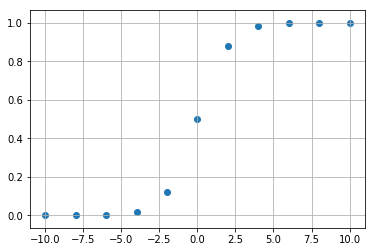

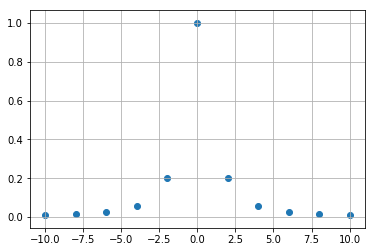

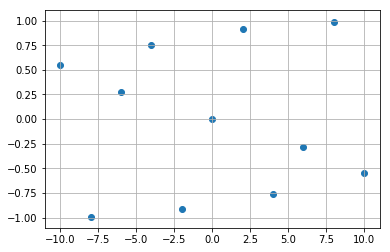

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

for func in [f, g, h]:
    y_observed = func(x_observed)
    plt.scatter(x_observed, y_observed)
    plt.grid()
    plt.show()

## 観測されない真実の姿

実験では観測されない真実の姿と比較してみましょう。

In [17]:
x_latent = np.linspace(-10, 10, 101)
x_latent

array([-10. ,  -9.8,  -9.6,  -9.4,  -9.2,  -9. ,  -8.8,  -8.6,  -8.4,
        -8.2,  -8. ,  -7.8,  -7.6,  -7.4,  -7.2,  -7. ,  -6.8,  -6.6,
        -6.4,  -6.2,  -6. ,  -5.8,  -5.6,  -5.4,  -5.2,  -5. ,  -4.8,
        -4.6,  -4.4,  -4.2,  -4. ,  -3.8,  -3.6,  -3.4,  -3.2,  -3. ,
        -2.8,  -2.6,  -2.4,  -2.2,  -2. ,  -1.8,  -1.6,  -1.4,  -1.2,
        -1. ,  -0.8,  -0.6,  -0.4,  -0.2,   0. ,   0.2,   0.4,   0.6,
         0.8,   1. ,   1.2,   1.4,   1.6,   1.8,   2. ,   2.2,   2.4,
         2.6,   2.8,   3. ,   3.2,   3.4,   3.6,   3.8,   4. ,   4.2,
         4.4,   4.6,   4.8,   5. ,   5.2,   5.4,   5.6,   5.8,   6. ,
         6.2,   6.4,   6.6,   6.8,   7. ,   7.2,   7.4,   7.6,   7.8,
         8. ,   8.2,   8.4,   8.6,   8.8,   9. ,   9.2,   9.4,   9.6,
         9.8,  10. ])

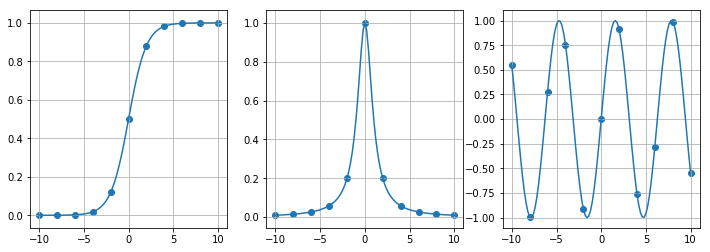

In [18]:
fig_idx = 0
plt.figure(figsize=(12,4))
for func in [f, g, h]:
    fig_idx += 1
    y_observed = func(x_observed)
    y_latent = func(x_latent)
    plt.subplot(1, 3, fig_idx)
    plt.scatter(x_observed, y_observed)
    plt.plot(x_latent, y_latent)
    plt.grid()
plt.show()

さて、ここで求めたいことは、限られた観測値から、この「真実の姿」にどれだけ近いものを導き出せるかということです。

# Scipy.interpolate を使った様々な補間法

scipy には interpolate という強力なライブラリが用意されていて、様々な補間法が使えます。

In [19]:
from scipy import interpolate

In [20]:
ip1 = ["最近傍点補間", lambda x, y: interpolate.interp1d(x, y, kind="nearest")]
ip2 = ["線形補間", interpolate.interp1d]
ip3 = ["ラグランジュ補間", interpolate.lagrange]
ip4 = ["重心補間", interpolate.BarycentricInterpolator]
ip5 = ["Krogh補間", interpolate.KroghInterpolator]
ip6 = ["2次スプライン補間", lambda x, y: interpolate.interp1d(x, y, kind="quadratic")]
ip7 = ["3次スプライン補間", lambda x, y: interpolate.interp1d(x, y, kind="cubic")]
ip8 = ["秋間補間", interpolate.Akima1DInterpolator]
ip9 = ["区分的 3 次エルミート補間", interpolate.PchipInterpolator]

最近傍点補間


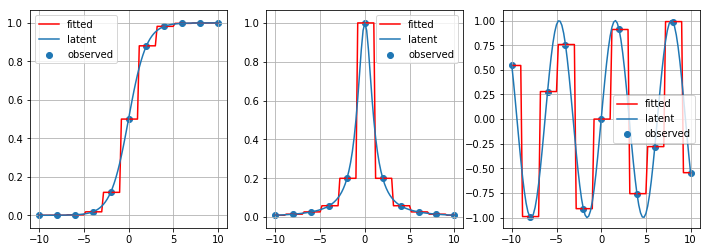

線形補間


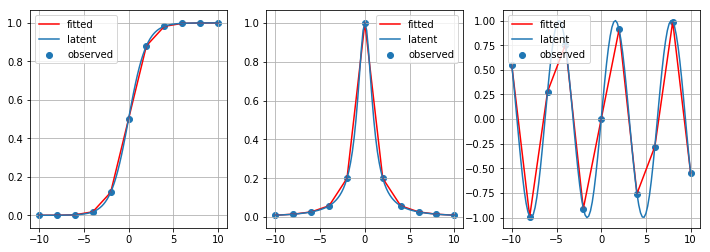

ラグランジュ補間


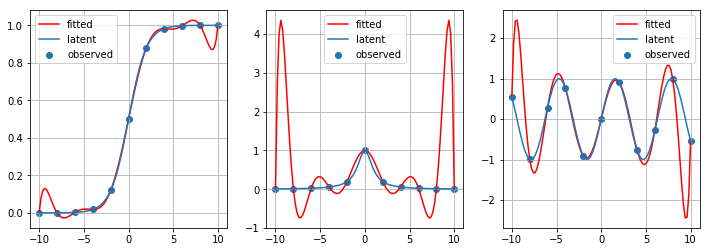

重心補間


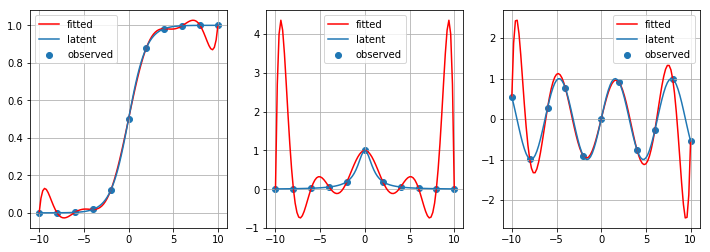

Krogh補間


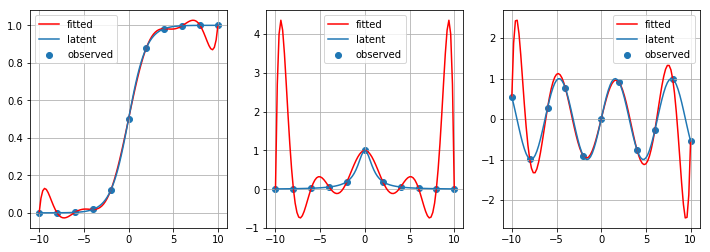

2次スプライン補間


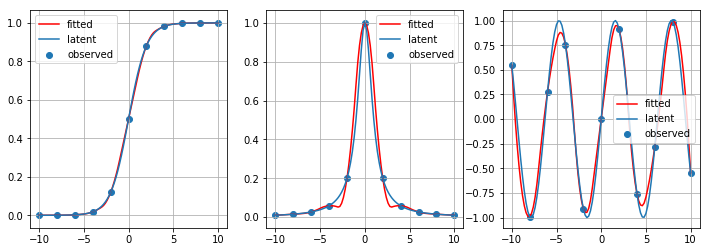

3次スプライン補間


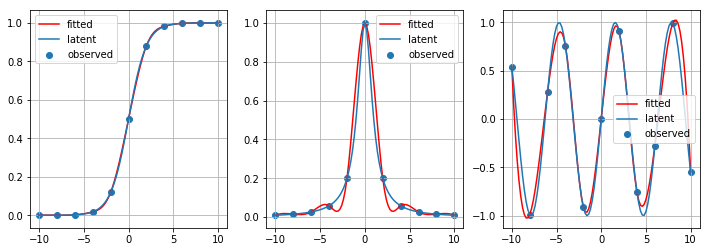

秋間補間


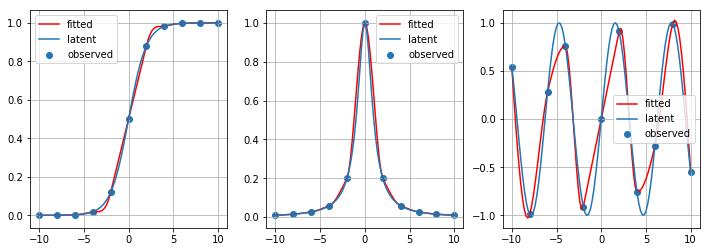

区分的 3 次エルミート補間


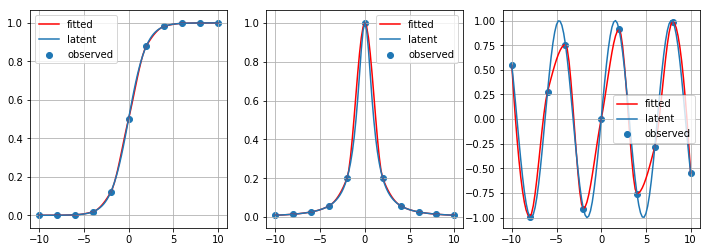

In [21]:
for method_name, method in [ip1, ip2, ip3, ip4, ip5, ip6, ip7, ip8, ip9]:
    print(method_name)
    fig_idx = 0
    plt.figure(figsize=(12,4))
    for func in [f, g, h]:
        fig_idx += 1
        y_observed = func(x_observed)
        y_latent = func(x_latent)
        fitted_curve = method(x_observed, y_observed)
        plt.subplot(1, 3, fig_idx)
        plt.scatter(x_observed, y_observed, label="observed")
        plt.plot(x_latent, fitted_curve(x_latent), c="red", label="fitted")
        plt.plot(x_latent, y_latent, label="latent")
        plt.grid()
        plt.legend()
    plt.show()

# Numpy.polyfit を使ったカーブフィッティング

Numpy の .polfyfit を用いると、最小2乗法によるカーブフィッティングが簡単にできます。改めて、実験により観測された飛び飛びの観測値を計算し直しておくと

In [26]:
x_observed = np.linspace(-10, 10, 11)
x_observed

array([-10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,   4.,   6.,   8.,  10.])

In [27]:
y_observed = f(x_observed)
y_observed

array([4.53978687e-05, 3.35350130e-04, 2.47262316e-03, 1.79862100e-02,
       1.19202922e-01, 5.00000000e-01, 8.80797078e-01, 9.82013790e-01,
       9.97527377e-01, 9.99664650e-01, 9.99954602e-01])

上記の x, y に対して、最小2乗法による線形回帰を行うと

In [28]:
np.polyfit(x_observed, y_observed, 1)

array([0.06668944, 0.5       ])

上記の戻り値がそのまま y = ax + b の係数 a, b に相当します。つまり

y = 0.06668944 x + 0.5

というのが、得られた回帰式です。

最後の引数で何次式に回帰するかが指定できます。たとえば３次式にフィッティングしたければ

In [25]:
np.polyfit(x_observed, y_observed, 3)

array([-0.00074604,  0.        ,  0.11980739,  0.5       ])

y = -0.00074604 x<sup>3</sup> + 0.11980739 x + 0.5

に回帰できたことを示しています。

得られたカーブを描くためには、複数のxとそれに対応するyが必要ですが、それは以下のように得られます。

In [29]:
np.poly1d(np.polyfit(x_observed, y_observed, 3))(x_observed)

array([ 0.04796474, -0.07648735, -0.05770001,  0.0685169 ,  0.26635352,
        0.5       ,  0.73364648,  0.9314831 ,  1.05770001,  1.07648735,
        0.95203526])

では、先ほどの3つの数学関数 f(x), g(x), h(x) を1〜9次式でフィッティングして図示してみましょう。

In [30]:
cf1 = ["最小2乗法（1次式）", lambda x, y: np.polyfit(x, y, 1)]
cf2 = ["最小2乗法（2次式）", lambda x, y: np.polyfit(x, y, 2)]
cf3 = ["最小2乗法（3次式）", lambda x, y: np.polyfit(x, y, 3)]
cf4 = ["最小2乗法（4次式）", lambda x, y: np.polyfit(x, y, 4)]
cf5 = ["最小2乗法（5次式）", lambda x, y: np.polyfit(x, y, 5)]
cf6 = ["最小2乗法（6次式）", lambda x, y: np.polyfit(x, y, 6)]
cf7 = ["最小2乗法（7次式）", lambda x, y: np.polyfit(x, y, 7)]
cf8 = ["最小2乗法（8次式）", lambda x, y: np.polyfit(x, y, 8)]
cf9 = ["最小2乗法（9次式）", lambda x, y: np.polyfit(x, y, 9)]

最小2乗法（1次式）


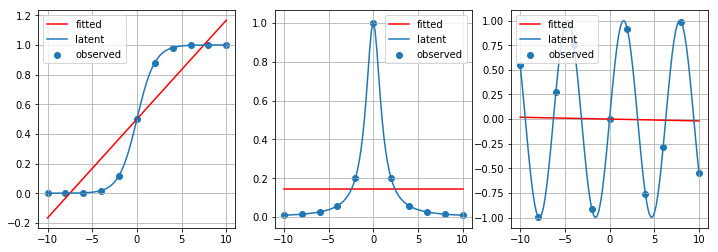

最小2乗法（2次式）


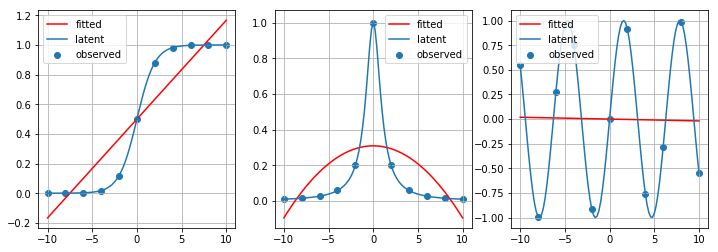

最小2乗法（3次式）


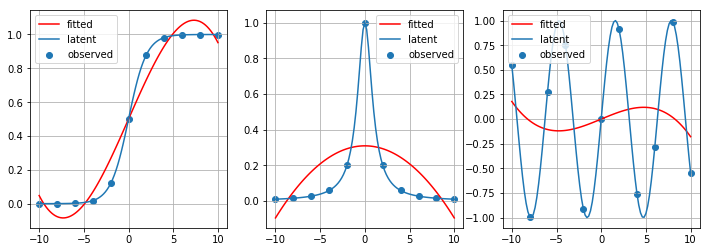

最小2乗法（4次式）


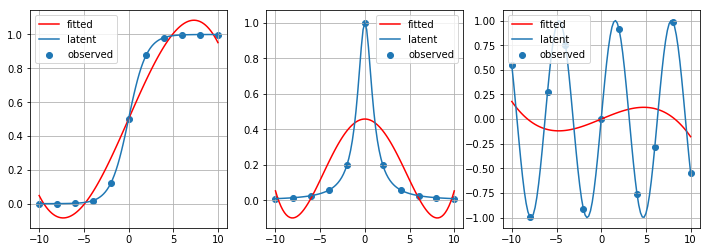

最小2乗法（5次式）


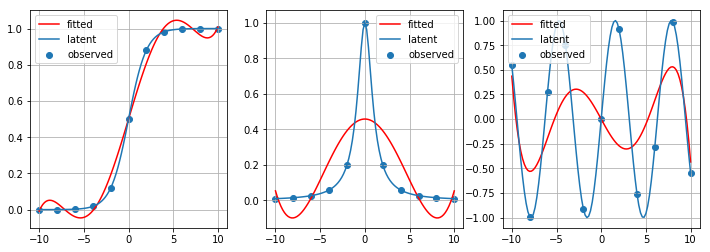

最小2乗法（6次式）


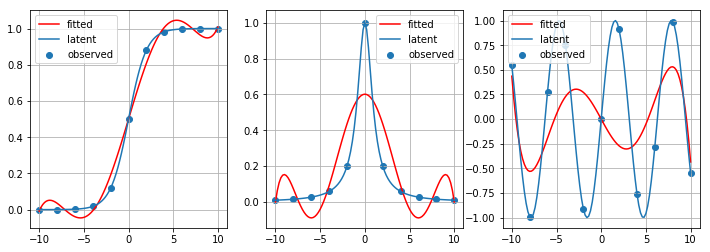

最小2乗法（7次式）


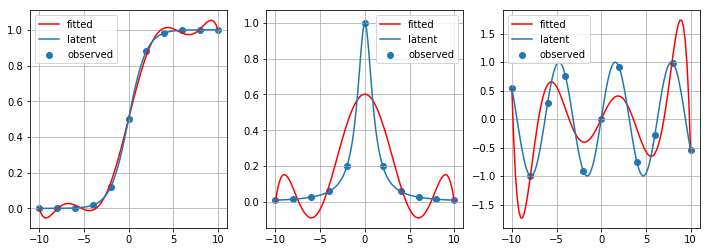

最小2乗法（8次式）


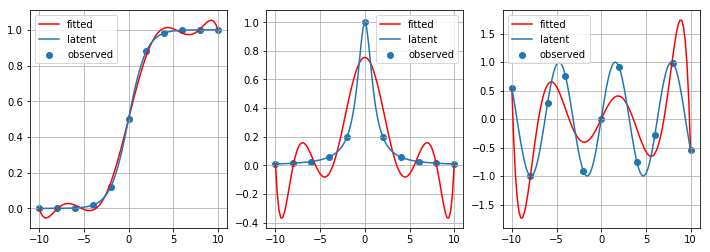

最小2乗法（9次式）


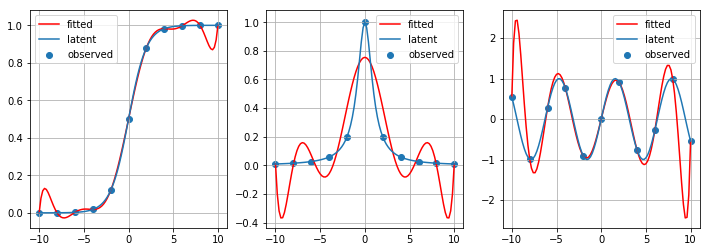

In [31]:
for method_name, method in [cf1, cf2, cf3, cf4, cf5, cf6, cf7, cf8, cf9]:
    print(method_name)
    fig_idx = 0
    plt.figure(figsize=(12,4))
    for func in [f, g, h]:
        fig_idx += 1
        y_observed = func(x_observed)
        y_latent = func(x_latent)
        #print(method(x_observed, y_observed))
        #print(np.poly1d(method(x_observed, y_observed))(x_observed))
        fitted_curve = np.poly1d(method(x_observed, y_observed))(x_latent)
        plt.subplot(1, 3, fig_idx)
        plt.scatter(x_observed, y_observed, label="observed")
        plt.plot(x_latent, fitted_curve, c="red", label="fitted")
        plt.plot(x_latent, y_latent, label="latent")
        plt.grid()
        plt.legend()
    plt.show()

# Scipy.optimize を使う方法

カーブフィッティングを行う方法は他にも、Scipy.optimize を使う方法があります。

## Scipy.optimize.curve_fit

Scipy.optimize.curve_fit がカーブフィッティング用の関数ですが、Numpy.polyfit のほうが正直使いやすいです。図示は省略します。

In [15]:
from scipy import optimize

eq1 = lambda x, a0, a1: a0 + a1 * x
optimize.curve_fit(eq1, x_observed, y_observed)

(array([-2.18114415e-12, -1.86569661e-03]), array([[ 0.61148173, -0.        ],
        [ 0.        ,  0.00138973]]))

## Scipy.optimize.leastsq

Scipy.optimize.leastsq を使ってもカーブフィッティングできますが、Numpy.polyfit のほうが正直使いやすいです。図示は省略します。

In [16]:
from scipy import optimize

eq1 = lambda a, x, y: y - a[0] - a[1] * x
param = [0, 0]
optimize.leastsq(eq1, param, args=(x_observed, y_observed))

(array([-1.33897935e-16, -1.86569660e-03]), 1)

# 課題

## 課題1

インターネットで検索して、以下の問いに答えてください。

* 補間法と、最小2乗法によるカーブフィッティングの違いは何か、説明してください。
* ラグランジュ補間とスプライン補間の違いは何か、説明してください。

## 課題2

（Scipy.interpolateもNumpy.polyfitもScipy.optimizeも使わない問題）

* ラグランジュ補間を行う Python プログラムをインターネットで検索し、それを使って上記の f(x), g(x), h(x) を補間してください。そのプログラムが記載してあったURLを明記してください。ただし、Scipy.interpolateもNumpy.polyfitもScipy.optimizeも使わないこと。


* スプライン補間を行う Python プログラムをインターネットで検索し、それを使って上記の f(x), g(x), h(x) を補間してください。そのプログラムが記載してあったURLを明記してください。ただし、Scipy.interpolateもNumpy.polyfitもScipy.optimizeも使わないこと。


* 最小2乗法を行う Python プログラムをインターネットで検索し、それを使って上記の f(x), g(x), h(x) を1〜9次式で近似してください。そのプログラムが記載してあったURLを明記してください。ただし、Scipy.interpolateもNumpy.polyfitもScipy.optimizeも使わないこと。